In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics


In [ ]:
true_df = pd.read_csv("../data/True.csv")
fake_df = pd.read_csv("../data/Fake.csv")

In [33]:
true_df["label"] = 0  # Real news
fake_df["label"] = 1  # Fake news

In [34]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
df['content'] = df[['title', 'text']].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [36]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
#vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) - variation 2
#vectorizer = TfidfVectorizer(stop_words='english', max_features=10000) - variation 3
X = vectorizer.fit_transform(df["content"])
y = df["label"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score =  metrics.f1_score(y_test, y_pred)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1_score)

Accuracy: 0.9975501113585746
Precision: 0.9980818414322251
Recall: 0.9972316865417377
F-measure: 0.9976565828717513


In [41]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99697   0.99790   0.99743      4284
           1    0.99808   0.99723   0.99766      4696

    accuracy                        0.99755      8980
   macro avg    0.99753   0.99757   0.99755      8980
weighted avg    0.99755   0.99755   0.99755      8980



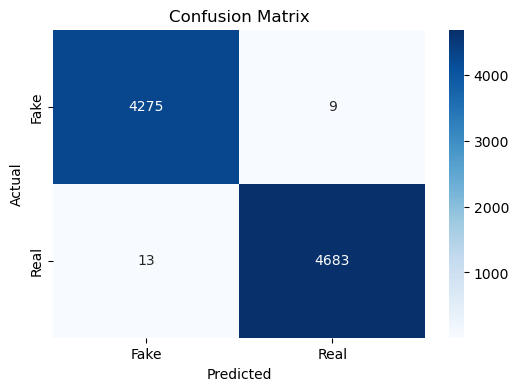

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
feature_importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

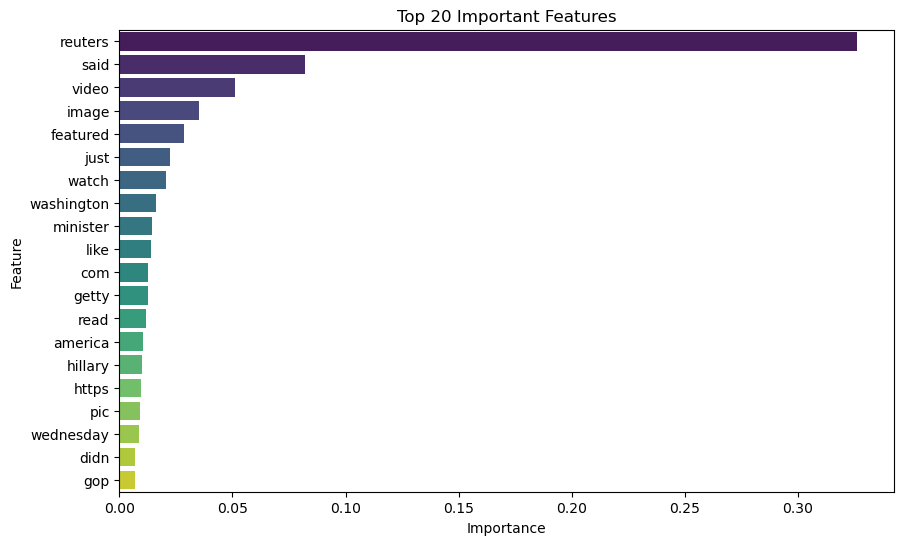

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()